# **The whole file is not run in once at it was a bit computational heavy . it was run on google colab some block will have the output below them ** 
### uploaded on https://github.com/tenoob/Machine-Learning/tree/master/Digit_Recognizer

In [15]:
#used the thundersvm insted of sklearn svm
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
!ls  # Check if required cuda 9.0 amd64-deb file is downloaded
!dpkg -i cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
!ls /var/cuda-repo-9-0-local | grep .pub
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
!apt-get update
!sudo apt-get install cuda-9.0
!nvcc --version
!pip install thundersvm

--2020-11-09 18:39:19--  https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.0.24
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.0.24|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64.deb?nTTEjN3NPvB0fmF6TYQXNfCVEL8pskZEEChfO9YMdJVif1yjrKaXejb-YxhaOi1PBTuCULtsrxSKVqH7pascKIVE2vVgdfgVL6owigGAiSeuPYD1Vbt3mcPG1uuUfPrLOxtPzDZqNEDgqwt_uEoiWwf_w38ihx0GmLmszFhOcb4CJUT82uNIL6_cIQStlssg8aN6uZhBnz5dhWIM10aN [following]
--2020-11-09 18:39:19--  https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64.deb?nTTEjN3NPvB0fmF6TYQXNfCVEL8pskZEEChfO9YMdJVif1yjrKaXejb-YxhaOi1PBTuCULtsrxSKVqH7pascKIVE2vVgdfgVL6owigGAiSeuPYD1Vbt3

In [1]:
#importing the csv for train
import pandas as pd
train_dataset = pd.read_csv("/content/drive/My Drive/Digit Recognizer/Dataset/train.csv")

In [2]:
validation_dataset = pd.read_csv("/content/drive/My Drive/Digit Recognizer/Dataset/test.csv")
submit_data = pd.read_csv("/content/drive/My Drive/Digit Recognizer/Dataset/sample_submission.csv")

In [3]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
train_dataset.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

there are no missing data in dataset

Data Visualization

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


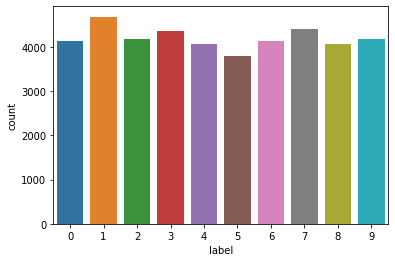

In [6]:
sns.countplot(train_dataset["label"])

In [7]:
train_dataset.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

the data is not properly distribured 1 has the most and 5 has the least

Data Preparation

In [8]:
#avg the feature
round(train_dataset.drop('label' , axis=1).mean(),2)

pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 784, dtype: float64

not much *use*

In [9]:
# splititng into x and y
y = train_dataset['label']
x = train_dataset.drop(['label'],axis =1 )

In [10]:
#normalise the independent variables for train and test set
x = x/255.0
validation_dataset = validation_dataset/255.0

In [11]:
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#scaling it
from sklearn.preprocessing import scale
scale_x = scale(x)

In [13]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train ,y_test = train_test_split(scale_x,y,
                                                      test_size = 0.3, random_state = 100)

**Model building** **linear**

In [16]:
#from sklearn.svm import SVC
from thundersvm import SVC
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn import metrics

In [ ]:
linear_model  = SVC(kernel='linear')
linear_model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#predict
y_pred = linear_model.predict(x_test)

In [ ]:
from sklearn import metrics

In [ ]:
print("accuracy : {} ".format( metrics.accuracy_score(y_test,y_pred)))
print(metrics.confusion_matrix(y_test,y_pred))

accuracy : 0.9146825396825397 
[[1209    0    4    5    6   10    6    2    0    0]
 [   0 1402    6    2    0    2    0    4    7    1]
 [  16   10 1070   21   18   12    9   15   26    2]
 [   4    6   50 1159    1   43    2    6   17    8]
 [   2    7   16    2 1116    5    9    5    2   40]
 [  12    6    6   48   13 1032   13    4   36    8]
 [   8    2   19    1   10   20 1188    0    2    0]
 [   1    4   24    7   21    0    1 1190    6   30]
 [  11   33   30   58   11   38   11    4 1031    9]
 [   4    6    8   10   59    4    0   55   13 1128]]


using a default linear model we where able to achieve a test accuracy of 91%

In [ ]:
rbf_model  = SVC(kernel='rbf')
rbf_model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_rbf = rbf_model.predict(x_test)

In [ ]:
print("accuracy : {} ".format( metrics.accuracy_score(y_test,y_pred_rbf)))
print(metrics.confusion_matrix(y_test,y_pred_rbf))

accuracy : 0.9563492063492064 
[[1218    0    7    3    2    2    7    1    2    0]
 [   0 1395   13    2    2    0    2    3    5    2]
 [   7    3 1151    7    8    1    1    9    9    3]
 [   0    2   26 1225    1   14    2    9   11    6]
 [   0    2   17    0 1141    1    7    7    3   26]
 [   2    2   15   14    2 1120   14    4    4    1]
 [   4    1   16    0    3    3 1221    0    2    0]
 [   1    8   33    0    5    0    0 1222    1   14]
 [   5    9   15   16    7    8    6    4 1160    6]
 [   3    2   11    7   20    2    0   37    8 1197]]


using default rbf we have increse the test accuracy to 95%

In [ ]:
poly_model = SVC(kernel='poly')
poly_model.fit(x_train,y_train)
y_pred_poly = poly_model.predict(x_test)

In [ ]:
print("accuracy : {} ".format( metrics.accuracy_score(y_test,y_pred_poly)))
print(metrics.confusion_matrix(y_test,y_pred_poly))

accuracy : 0.9445238095238095 
[[1194    0    4    1    9    5    7    0   21    1]
 [   0 1393    9    2    3    0    2    2   12    1]
 [   3    3 1102    6   16    2    0    3   60    4]
 [   0    4   11 1210    1   12    3    6   41    8]
 [   0    3    9    0 1149    2    2    0    6   33]
 [   0    0    1   13    8 1096   10    3   35   12]
 [   1    2    1    0   10    6 1218    0   12    0]
 [   0    8   10    2   33    0    0 1164   13   54]
 [   0    4    7   11    8   10    0    4 1185    7]
 [   2    1    1    6   42    0    0   15   30 1190]]


so by using poly we achieve test accuracy of 94%

lets tune the rfe svm too exteact a better fit

**model building usign Gridsearchcv**

In [17]:
param =[ {'C':[10,5],
         'gamma': [1e-2, 1e-3, 1e-4] }]

folds = KFold(n_splits=5 , shuffle= True , random_state=10)

In [18]:
SVMmodel = SVC(kernel='rbf')
Grid_model = GridSearchCV(estimator=SVMmodel, param_grid=param,
                          scoring='accuracy',cv=folds , verbose=1,return_train_score=True,n_jobs=-1)

In [19]:
Grid_model.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, cache_size=None, class_weight=None, coef0=0.0,
                           decision_function_shape='ovo', degree=3,
                           gamma='auto', gpu_id=0, kernel='rbf', max_iter=-1,
                           max_mem_size=-1, n_jobs=-1, probability=False,
                           random_state=None, shrinking=False, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [10, 5], 'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [20]:
result = pd.DataFrame(Grid_model.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,39.096731,3.101730,2.321067,0.120589,10,0.01,"{'C': 10, 'gamma': 0.01}",0.830442,0.814626,0.825340,0.819898,0.830952,0.824252,0.006261,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,15.026202,1.133477,1.540182,0.089955,10,0.001,"{'C': 10, 'gamma': 0.001}",0.963776,0.962245,0.963605,0.960034,0.964116,0.962755,0.001502,1,0.998384,0.998639,0.998512,0.998512,0.998682,0.998546,0.000106
2,13.553485,0.522804,1.475104,0.086107,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.942857,0.942347,0.942517,0.940306,0.942517,0.942109,0.000916,3,0.961650,0.961862,0.961650,0.961267,0.962287,0.961743,0.000333
3,39.609934,3.370666,2.055602,0.084820,5,0.01,"{'C': 5, 'gamma': 0.01}",0.830442,0.814626,0.825340,0.819898,0.830952,0.824252,0.006261,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,14.245057,1.183098,1.569596,0.082163,5,0.001,"{'C': 5, 'gamma': 0.001}",0.963435,0.961224,0.962415,0.959864,0.962925,0.961973,0.001284,2,0.995323,0.995153,0.995663,0.995196,0.995621,0.995391,0.000213
5,13.072289,0.515621,1.518442,0.028883,5,0.0001,"{'C': 5, 'gamma': 0.0001}",0.938265,0.938776,0.941497,0.937755,0.939286,0.939116,0.001295,4,0.953019,0.954337,0.953912,0.953784,0.954549,0.953920,0.000529


In [22]:
best_score = Grid_model.best_score_
best_hyper = Grid_model.best_params_

In [23]:
print(best_score)
print(best_hyper)

0.9627551020408163
{'C': 10, 'gamma': 0.001}


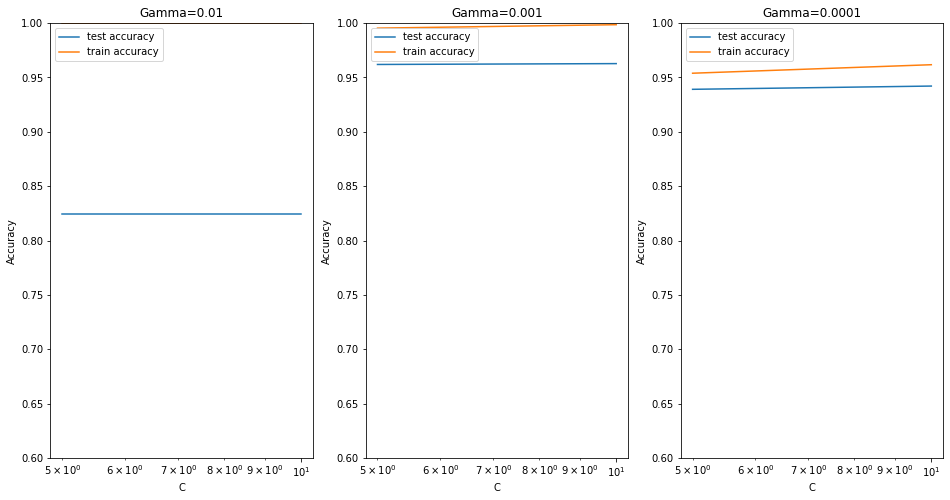

In [47]:
result['param_C'] = result['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,8))

# subplot 1/3
plt.subplot(131)
gamma_01 = result[result['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = result[result['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = result[result['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


so we achieve a test accuracy of 96% for a rbf with gamma as 1e-3 and c as 10

build the final model

In [29]:
final_model = SVC(kernel='rbf',C=10,gamma=1e-3)

In [30]:
final_model.fit(x_train,y_train)

SVC(C=10, cache_size=None, class_weight={}, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.001, gpu_id=0,
    kernel='rbf', max_iter=-1, max_mem_size=-1, n_jobs=-1, probability=False,
    random_state=None, shrinking=False, tol=0.001, verbose=False)

In [32]:
y_pred_final = final_model.predict(x_test)

In [33]:
print("accuracy : {} ".format( metrics.accuracy_score(y_test,y_pred_final)))
print(metrics.confusion_matrix(y_test,y_pred_final))

accuracy : 0.9642857142857143 
[[1223    0    6    1    0    2    5    3    2    0]
 [   0 1406   10    1    0    0    0    3    3    1]
 [   6    2 1151   10    5    2    2    9    9    3]
 [   1    1   19 1242    0   16    1    4    7    5]
 [   1    5   13    0 1145    0    9    9    2   20]
 [   2    1   10   11    0 1130   12    2    5    5]
 [   2    0   11    0    3    2 1230    0    2    0]
 [   1    4   23    2    2    1    1 1236    1   13]
 [   3    7   11   15    9   10    5    3 1167    6]
 [   3    2    9    3   15    3    0   27    5 1220]]


**We have done the train and test now lets validate**

In [39]:
validation_dataset = scale(validation_dataset)

In [40]:
y_pred_validation = final_model.predict(validation_dataset)

In [41]:
submit_data['predicted'] = y_pred_validation

In [42]:
submit_data.head()

,ImageId,Label,predicted
0,1,0,2.0
1,2,0,0.0
2,3,0,9.0
3,4,0,9.0
4,5,0,3.0


In [43]:
print("accuracy : {} ".format( metrics.accuracy_score(submit_data["Label"],submit_data["predicted"])))
print(metrics.confusion_matrix(submit_data["Label"],submit_data["predicted"]))

accuracy : 0.09914285714285714 
[[2776 3222 2956 2770 2732 2511 2732 2895 2658 2748]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]


In [44]:
submit_data.to_csv('final.csv')

we got a very bad validation accuracy of just 9%